In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

In [34]:
try :
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [11]:
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [41]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [42]:
table = soup.find('table', {'class' : 'tData01'})
table
trs = table.find_all('tr')
trs
name = []
avg = []
h = []
hr = []
rbi = []

for tr in trs :
    tds = tr.find_all('td')
    
    for td in tds :
        if (td.find('a')) :
            name.append(td.find('a').string)
            avg.append(tds[3].text)
            h.append(tds[8].text)
            hr.append(tds[11].text)
            rbi.append(tds[13].text)


In [43]:
baseballPlayer_df = pd.DataFrame({
    'name' : name,
    'avg' : avg,
    'hit' : h,
    'homerun' : hr,
    'rbi' : rbi
})


In [44]:
baseballPlayer_df.to_csv('baseballPlayer_df.csv', mode = 'w', encoding = 'utf-8')

In [46]:
pf=pd.read_csv('baseballPlayer_df.csv',index_col='name',encoding='utf-8')
pf

,Unnamed: 0,avg,hit,homerun,rbi
name,,,,,
페르난데스,0,0.355,173,18,87
김현수,1,0.352,161,21,107
손아섭,2,0.350,150,8,67
이정후,3,0.347,165,15,97
박민우,4,0.345,128,4,49
최형우,5,0.344,144,17,80
로하스,6,0.344,157,37,108
양의지,7,0.328,120,23,100
나성범,8,0.327,134,29,96


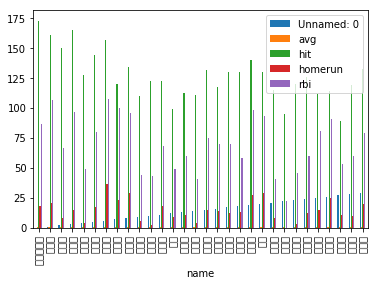

In [48]:
pf.plot.bar()